In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

## Step 1: Helper Functions 

### Convert to datetime object and add new time features

In [3]:
def to_datetime(df):
    df1 = df.copy()
    df1['starttime'] = pd.to_datetime(df1['starttime'])
    df1['stoptime'] = pd.to_datetime(df1['stoptime'])
    df1['start_date'] = df1['starttime'].dt.date
    df1['start_time'] = df1['starttime'].dt.time
    df1['start_hour'] = df1['starttime'].dt.hour
    df1['start_month'] = df1['starttime'].dt.month
    df1['start_dayofweek'] = df1['starttime'].dt.weekday   # Monday is 0, Sunday is 6
    #df1['start_dayofweek'] = df1['starttime'].dt.weekday_name  # The name of day in a week (e.g. Monday)
    df1['stop_date'] = df1['stoptime'].dt.date
    df1['stop_time'] = df1['stoptime'].dt.time
    df1['stop_hour'] = df1['stoptime'].dt.hour
    df1['stop_dayofweek'] = df1['stoptime'].dt.weekday
    return df1
# More datetime attributes can be found: https://kite.com/python/docs/pandas.core.indexes.accessors.DatetimeProperties 

### Take subset of each dataset

In [4]:
# Only focus on bike usage from 5am till 8pm 
def ignore_offpeak(df):
    df1 = df.copy()
    mask = df1['start_hour'].apply(lambda x: 5 <= x <= 20)
    return df1[mask]

## Step 2: Read csv and split all csv into train and test datasets

In [5]:
May2016 = pd.read_csv('../Tripdata/201605-citibike-tripdata.csv')

In [6]:
May2016.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [7]:
May2016.shape

(1212280, 15)

In [8]:
May2016.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1163442,297,5/31/2016 05:59:25,5/31/2016 06:04:22,492,W 33 St & 7 Ave,40.750200,-73.990931,402,Broadway & E 22 St,40.740343,-73.989551,19514,Subscriber,1982.0,1
400493,1312,5/12/2016 17:24:26,5/12/2016 17:46:18,137,E 56 St & Madison Ave,40.761628,-73.972924,236,St Marks Pl & 2 Ave,40.728419,-73.987140,19344,Subscriber,1984.0,1
1000732,834,5/26/2016 18:43:29,5/26/2016 18:57:24,529,W 42 St & 8 Ave,40.757570,-73.990985,444,Broadway & W 24 St,40.742354,-73.989151,17466,Subscriber,1972.0,1
731418,1173,5/20/2016 15:57:29,5/20/2016 16:17:03,2022,E 60 St & York Ave,40.759107,-73.959223,3135,E 75 St & 3 Ave,40.771129,-73.957723,17601,Subscriber,1970.0,2
779336,333,5/21/2016 17:36:59,5/21/2016 17:42:32,3002,South End Ave & Liberty St,40.711512,-74.015756,147,Greenwich St & Warren St,40.715422,-74.011220,17891,Subscriber,NaN,0


In [9]:
May2016 = to_datetime(May2016)
May2016.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,start_date,start_time,start_hour,start_month,start_dayofweek,stop_date,stop_time,stop_hour,stop_dayofweek
872525,638,2016-05-24 07:09:39,2016-05-24 07:20:18,3255,8 Ave & W 31 St,40.750585,-73.994685,461,E 20 St & 2 Ave,40.735877,...,1,2016-05-24,07:09:39,7,5,1,2016-05-24,07:20:18,7,1
1181541,1704,2016-05-31 13:16:30,2016-05-31 13:44:54,3182,Yankee Ferry Terminal,40.686931,-74.016966,3254,Soissons Landing,40.692317,...,0,2016-05-31,13:16:30,13,5,1,2016-05-31,13:44:54,13,1
549539,340,2016-05-16 17:43:44,2016-05-16 17:49:24,3150,E 85 St & York Ave,40.775369,-73.948034,3156,E 72 St & York Ave,40.766638,...,1,2016-05-16,17:43:44,17,5,0,2016-05-16,17:49:24,17,0
632129,1706,2016-05-18 15:21:53,2016-05-18 15:50:19,168,W 18 St & 6 Ave,40.739713,-73.994564,195,Liberty St & Broadway,40.709056,...,1,2016-05-18,15:21:53,15,5,2,2016-05-18,15:50:19,15,2
344524,674,2016-05-11 16:44:34,2016-05-11 16:55:48,368,Carmine St & 6 Ave,40.730386,-74.002150,445,E 10 St & Avenue A,40.727408,...,2,2016-05-11,16:44:34,16,5,2,2016-05-11,16:55:48,16,2


In [34]:
# Only focus on time from 5 am till 8 pm 
May2016 = ignore_offpeak(May2016)
May2016.shape

(1105158, 24)

In [11]:
# Inspect Missing Values 
May2016.isna().sum(axis = 0)

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 162533
gender                          0
start_date                      0
start_time                      0
start_hour                      0
start_month                     0
start_dayofweek                 0
stop_date                       0
stop_time                       0
stop_hour                       0
stop_dayofweek                  0
dtype: int64

In [41]:
# Take 10% as a subset
May2016_validate, May2016_train = train_test_split(May2016, test_size=0.05, random_state=42 )
May2016_notused, May2016_test = train_test_split(May2016_validate, test_size=0.05, random_state=42 )

In [43]:
May2016_train.shape # 5% of original dataset

(55258, 24)

In [44]:
May2016_test.shape # 5% of validate dataset(4.75% of orignal dataset)

(52495, 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A217DD4088>,
      dtype=object)

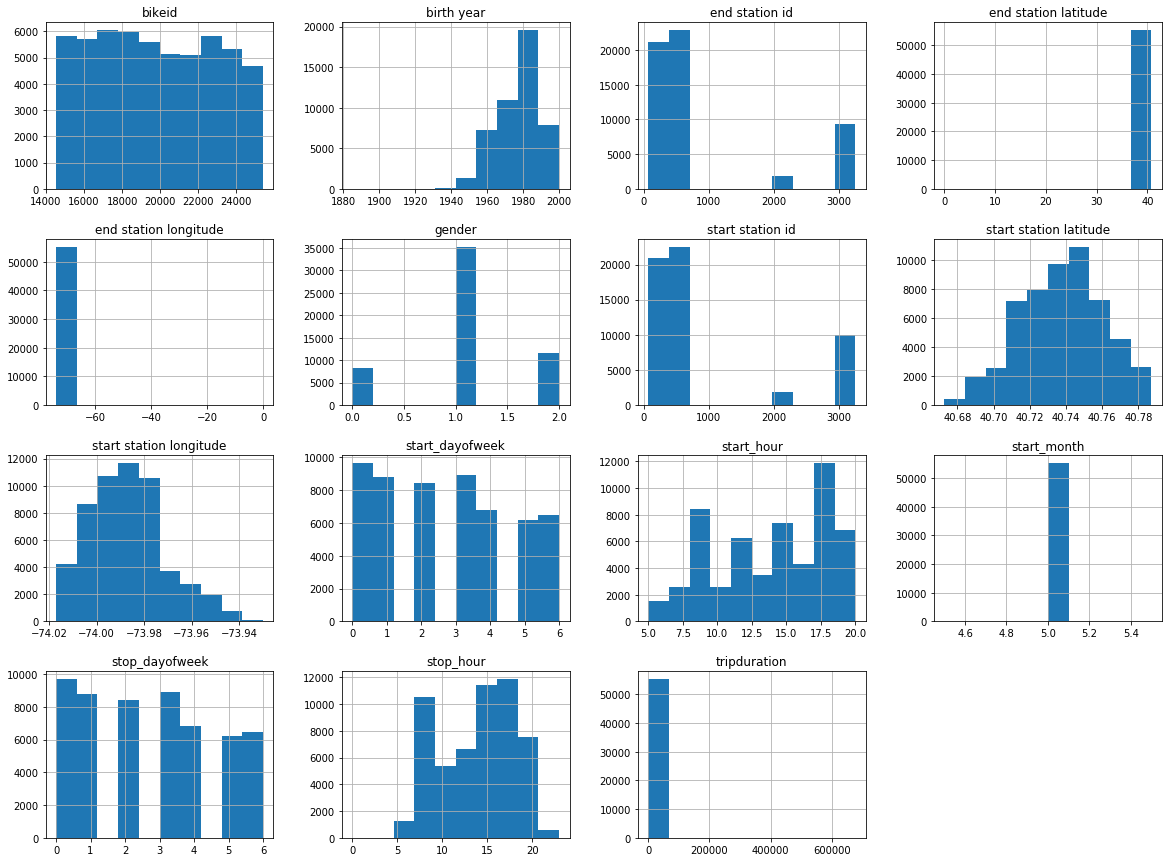

In [39]:
# Subset Data Hour Distribution
May2016_train.hist(figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A216CB7388>,
      dtype=object)

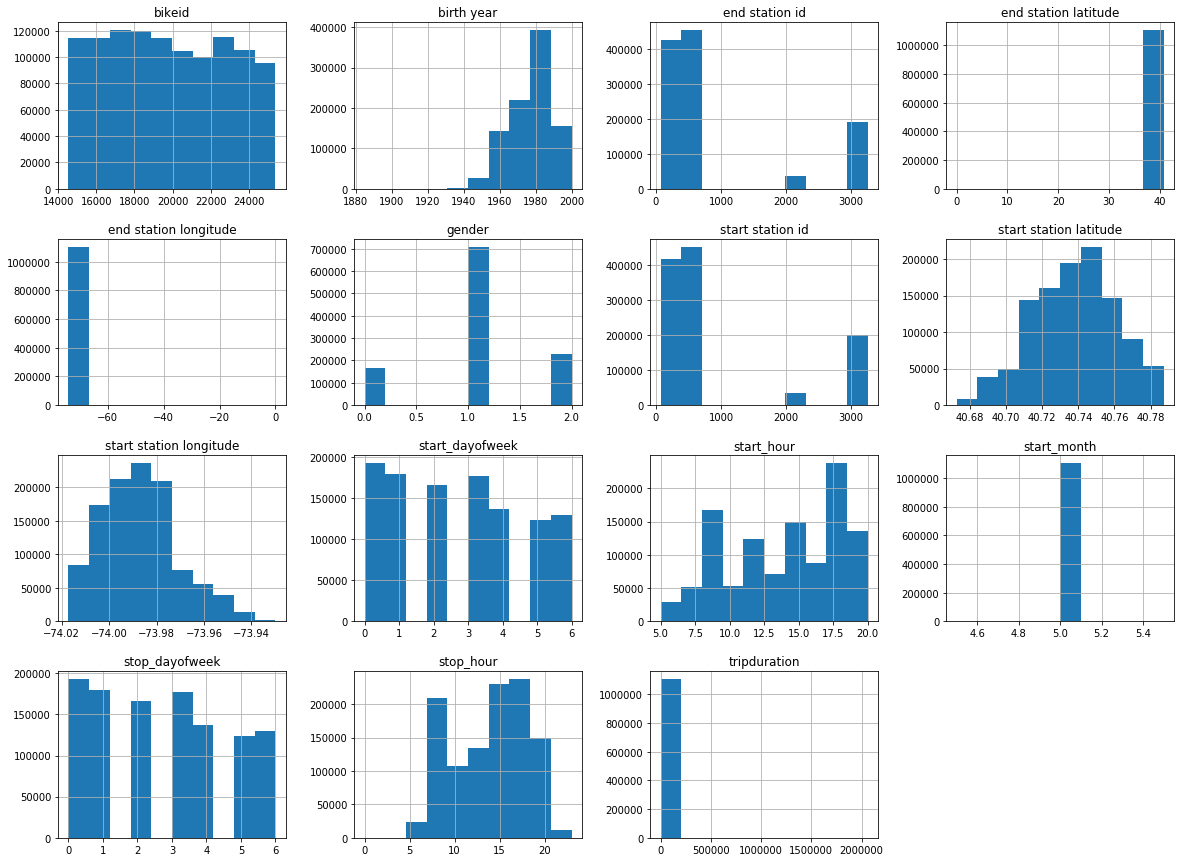

In [40]:
# Original Dataset Hour Distribution 
May2016.hist(figsize = (20,15))

In [45]:
May2016_train.to_csv('May2016train.csv')
May2016_test.to_csv('May2016test.csv')